In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob
from datetime import datetime,timedelta
import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['font.family']=['NanumGothic', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

In [3]:
files = glob.glob('G:\내 드라이브\Colab Notebooks\데이터분석\.data\서울열린데이터광장\서울시 초등학교 통계\*.csv')
files

['G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\서울열린데이터광장\\서울시 초등학교 통계\\초등학교_20230106050701.csv']

In [226]:
df = pd.read_csv(files[0],encoding='utf-8')
df.head()

,자치구별(1),자치구별(2),2010,2010.1,2010.2,2010.3,2010.4,2010.5,2010.6,2010.7,...,2021.11,2021.12,2021.13,2021.14,2021.15,2021.16,2021.17,2021.18,2021.19,2021.20
0,자치구별(1),자치구별(2),학교수 (개),학급수 (개),학생수 (명),학생수 (명),학생수 (명),교원수 (명),교원수 (명),교원수 (명),...,졸업자현황 (명),졸업자현황 (명),졸업자현황 (명),졸업자현황 (명),입학자수 (명),입학자수 (명),입학자수 (명),교지면적 (천㎡),건물면적 (천㎡),교실수 (개)
1,자치구별(1),자치구별(2),소계,소계,소계,남자,여자,소계,남자,여자,...,졸업자수,졸업자수,졸업자수,진학자수,소계,남자,여자,소계,소계,소계
2,자치구별(1),자치구별(2),소계,소계,소계,소계,소계,소계,소계,소계,...,소계,남자,여자,소계,소계,소계,소계,소계,소계,소계
3,합계,소계,587,20351,566149,294100,272049,29335,4616,24719,...,70430,36355,34075,70429,63690,32564,31126,7158,6034,24832
4,합계,종로구,14,324,8266,4329,3937,496,84,412,...,907,452,455,907,772,375,397,99,100,376


## 전처리

In [227]:
df.iloc[0,[i for i in range(2,len(df.columns))]] = np.array([df.iloc[0:3,[i]].sum().values[0] for i in range(2,len(df.columns))])

In [228]:
df.drop([1,2],inplace=True)

In [229]:
df.reset_index(inplace=True,drop=True)

In [230]:
columns = list(df.iloc[0,[i for i in range(2,len(df.columns))]].unique()) + ['자치구','연도']

In [231]:
areas = df['자치구별(2)'].loc[4:].unique()

In [232]:
sub_df = df[df['자치구별(2)']==areas[0]]

In [234]:
new_df = pd.DataFrame(columns=columns)

for i in range(12):
    tmp_idx = [j for j,c in enumerate(df.columns) if str(2010+i) in c]
    for a in areas:
        tmp_cols = df.iloc[0,tmp_idx].values
        tmp_df = df[df['자치구별(2)']==a]
        new_df.loc[len(new_df)] = np.zeros_like(columns,dtype='int')
        for c,idx in zip(tmp_cols,tmp_idx):
            new_df[c].iloc[-1] = tmp_df.iloc[0,[idx]].values[0]
        new_df['자치구'].iloc[-1] = a
        new_df['연도'].iloc[-1] = str(2010+i)


In [235]:
new_df = new_df.sort_values(['연도','자치구'],ascending=False)
new_df.reset_index(inplace=True, drop=True)

In [245]:
new_df[new_df.columns[:-2]] = new_df[new_df.columns[:-2]].astype('int')
new_cols = []
for c in new_df.columns:
    new_cols.append("".join(c.split('소계')))
new_df.columns = new_cols

In [246]:
new_df.head()

,학교수 (개),학급수 (개),학생수 (명),학생수 (명)남자,학생수 (명)여자,교원수 (명),교원수 (명)남자,교원수 (명)여자,직원수 (명),직원수 (명)남자,...,교지면적 (천㎡),건물면적 (천㎡),교실수 (개),입학자수 (명),졸업자현황 (명)졸업자수남자,졸업자현황 (명)졸업자수여자,입학자수 (명)남자,입학자수 (명)여자,자치구,연도
0,23,689,13862,7119,6743,1042,156,886,112,47,...,272,278,975,2215,1217,1197,1127,1088,중랑구,2021
1,30,907,19730,10158,9572,1368,179,1189,150,59,...,394,307,1226,3074,1770,1655,1601,1473,은평구,2021
2,15,347,6656,3428,3228,585,61,524,61,19,...,194,117,512,1099,576,596,561,538,용산구,2021
3,23,664,13776,7007,6769,1042,116,926,111,41,...,300,226,895,2400,1160,1023,1276,1124,영등포구,2021
4,30,1006,23469,12096,11373,1503,178,1325,146,46,...,355,298,1322,3389,2491,2255,1722,1667,양천구,2021


In [247]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   학교수 (개)          276 non-null    int32 
 1   학급수 (개)          276 non-null    int32 
 2   학생수 (명)          276 non-null    int32 
 3   학생수 (명)남자        276 non-null    int32 
 4   학생수 (명)여자        276 non-null    int32 
 5   교원수 (명)          276 non-null    int32 
 6   교원수 (명)남자        276 non-null    int32 
 7   교원수 (명)여자        276 non-null    int32 
 8   직원수 (명)          276 non-null    int32 
 9   직원수 (명)남자        276 non-null    int32 
 10  직원수 (명)여자        276 non-null    int32 
 11  졸업자현황 (명)졸업자수    276 non-null    int32 
 12  졸업자현황 (명)진학자수    276 non-null    int32 
 13  교지면적 (천㎡)        276 non-null    int32 
 14  건물면적 (천㎡)        276 non-null    int32 
 15  교실수 (개)          276 non-null    int32 
 16  입학자수 (명)         276 non-null    int32 
 17  졸업자현황 (명)졸업자수남자  276 non-null    in

In [248]:
new_df.describe()

,학교수 (개),학급수 (개),학생수 (명),학생수 (명)남자,학생수 (명)여자,교원수 (명),교원수 (명)남자,교원수 (명)여자,직원수 (명),직원수 (명)남자,...,졸업자현황 (명)졸업자수,졸업자현황 (명)진학자수,교지면적 (천㎡),건물면적 (천㎡),교실수 (개),입학자수 (명),졸업자현황 (명)졸업자수남자,졸업자현황 (명)졸업자수여자,입학자수 (명)남자,입학자수 (명)여자
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,...,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,24.960145,803.340580,19413.847826,10018.884058,9394.963768,1233.105072,170.467391,1062.637681,130.195652,58.637681,...,3616.887681,3615.594203,303.692029,239.268116,972.822464,2269.942029,797.239130,745.170290,749.271739,712.659420
std,7.007674,251.717605,6853.106898,3579.685335,3276.299116,369.336319,63.755690,324.524546,37.215023,18.619615,...,1453.072418,1452.414710,88.038851,66.699602,302.876166,1578.294104,907.381215,842.623977,833.784408,790.886964
min,14.000000,347.000000,6656.000000,3428.000000,3228.000000,568.000000,61.000000,507.000000,61.000000,19.000000,...,1160.000000,1160.000000,178.000000,117.000000,355.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,645.750000,14401.250000,7364.750000,6979.250000,978.250000,128.000000,844.750000,111.000000,47.000000,...,2502.500000,2502.500000,227.000000,203.000000,764.250000,815.250000,0.000000,0.000000,0.000000,0.000000
50%,23.000000,739.500000,18675.000000,9522.500000,9051.000000,1153.000000,156.500000,987.500000,120.000000,56.000000,...,3428.500000,3428.000000,281.000000,220.000000,927.500000,2499.000000,288.000000,273.000000,274.000000,269.000000
75%,29.250000,964.250000,23957.250000,12454.250000,11474.500000,1444.250000,194.250000,1253.250000,152.250000,67.250000,...,4462.750000,4456.000000,355.000000,289.250000,1168.500000,3500.000000,1435.750000,1345.000000,1385.250000,1305.000000
max,42.000000,1464.000000,41767.000000,21702.000000,20065.000000,2195.000000,430.000000,1993.000000,243.000000,126.000000,...,8596.000000,8593.000000,498.000000,394.000000,1771.000000,5712.000000,3051.000000,2818.000000,2863.000000,2791.000000


In [249]:
new_df.describe(include = np.object)

,자치구,연도
count,276,276
unique,23,12
top,중랑구,2021
freq,12,23


**연도별 학교수, 학급수, 교실수, 교지면적은?**

**연도별 학교당 학급수, 교실수, 교지면적, 건물면적은?**

**연도별 학생수, 교원수, 직원수는?**

**연도별 교원당 학생수는?**

**연도별 입학자수, 졸업자수는?**

**지역별 학교수, 학생수, 교원수, 직원수는?**

**지역별 교원당 학생수는?**

## 시각화

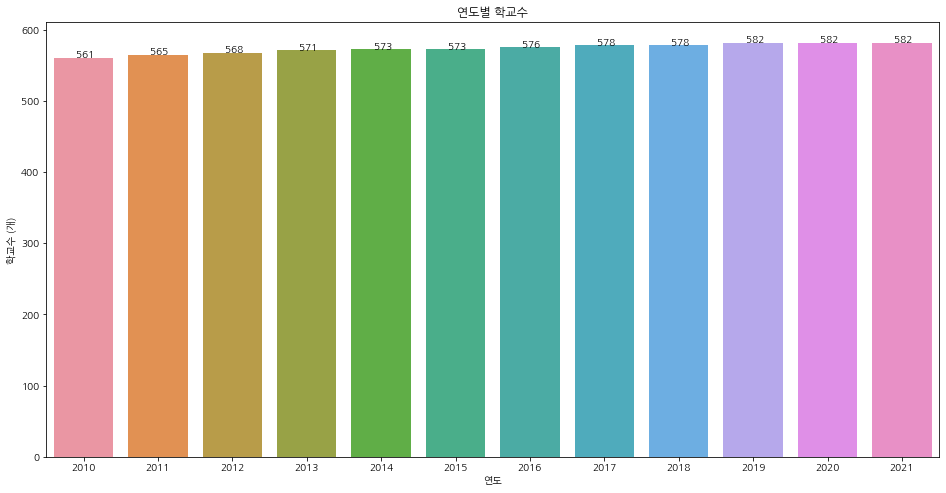

In [314]:
sub_df = new_df.groupby(['연도'],as_index=False)['학교수 (개)'].sum()
fig,axes = plt.subplots(1,1,figsize=(16,8))
sns.barplot(data=sub_df,x='연도',y='학교수 (개)',ax=axes).set(title='연도별 학교수')
for i in range(12):
    h = axes.patches[i].get_height()
    x = axes.patches[i].get_x()
    v = sub_df.values[i][1]
    axes.annotate(str(v),(x*1+0.3, h))

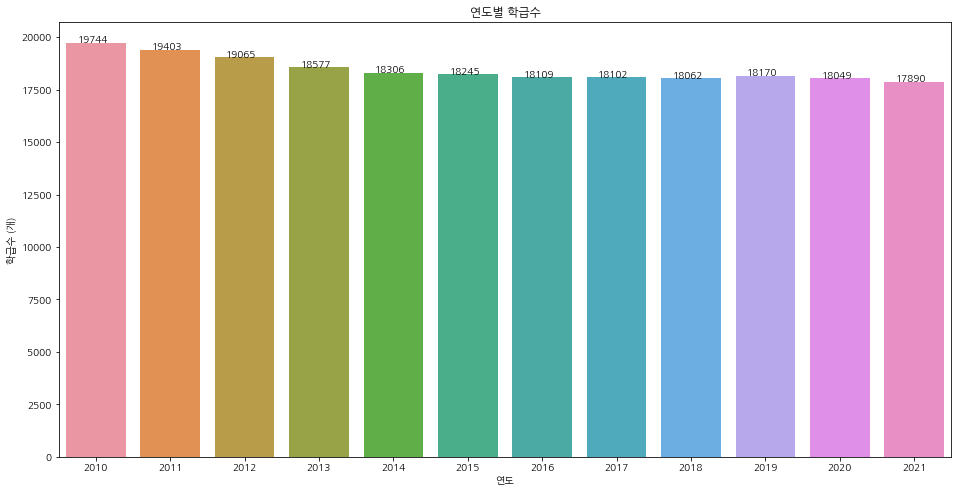

In [317]:
sub_df = new_df.groupby(['연도'],as_index=False)['학급수 (개)'].sum()
fig,axes = plt.subplots(1,1,figsize=(16,8))
sns.barplot(data=sub_df,x='연도',y='학급수 (개)',ax=axes).set(title='연도별 학급수')
for i in range(12):
    h = axes.patches[i].get_height()
    x = axes.patches[i].get_x()
    v = sub_df.values[i][1]
    axes.annotate(str(v),(x*1+0.15, h))

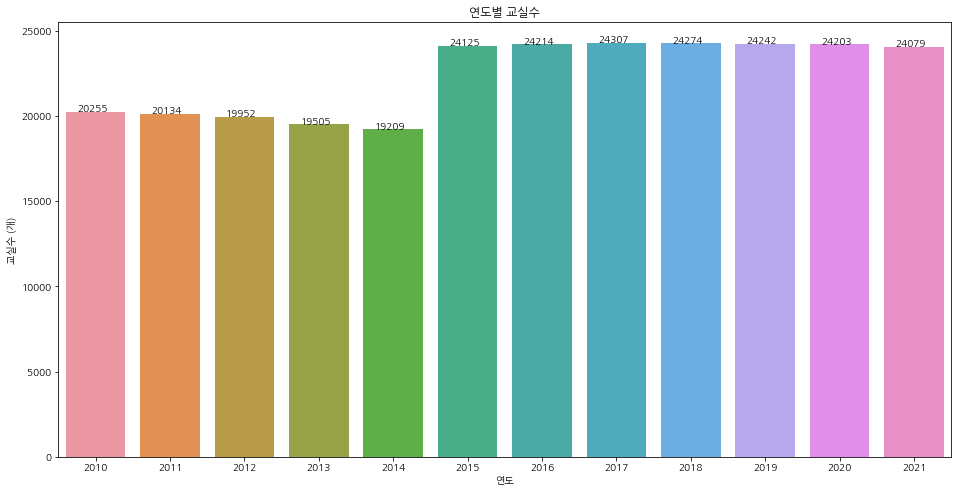

In [384]:
sub_df = new_df.groupby(['연도'],as_index=False)['교실수 (개)'].sum()
fig,axes = plt.subplots(1,1,figsize=(16,8))
sns.barplot(data=sub_df,x='연도',y='교실수 (개)',ax=axes).set(title='연도별 교실수')
for i in range(12):
    h = axes.patches[i].get_height()
    x = axes.patches[i].get_x()
    v = sub_df.values[i][1]
    axes.annotate(str(v),(x*1+0.15, h))

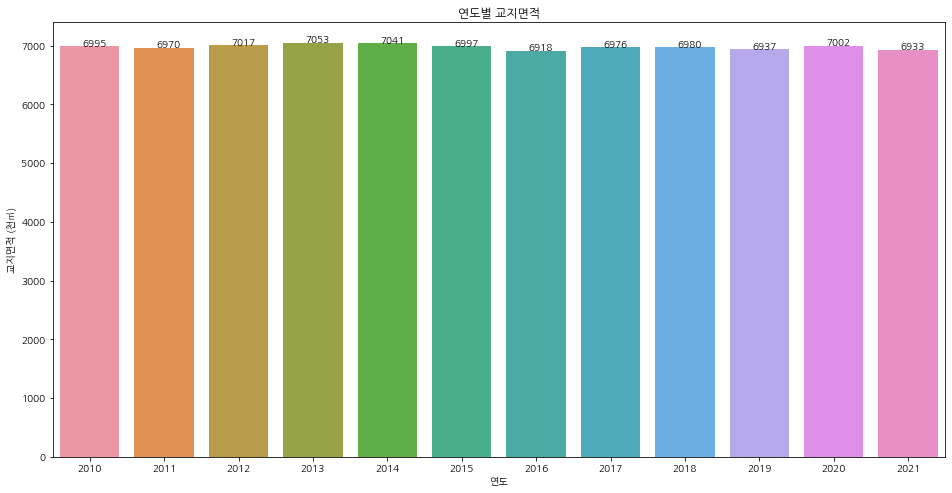

In [319]:
sub_df = new_df.groupby(['연도'],as_index=False)['교지면적 (천㎡)'].sum()
fig,axes = plt.subplots(1,1,figsize=(16,8))
sns.barplot(data=sub_df,x='연도',y='교지면적 (천㎡)',ax=axes).set(title='연도별 교지면적')
for i in range(12):
    h = axes.patches[i].get_height()
    x = axes.patches[i].get_x()
    v = sub_df.values[i][1]
    axes.annotate(str(v),(x*1+0.3, h))

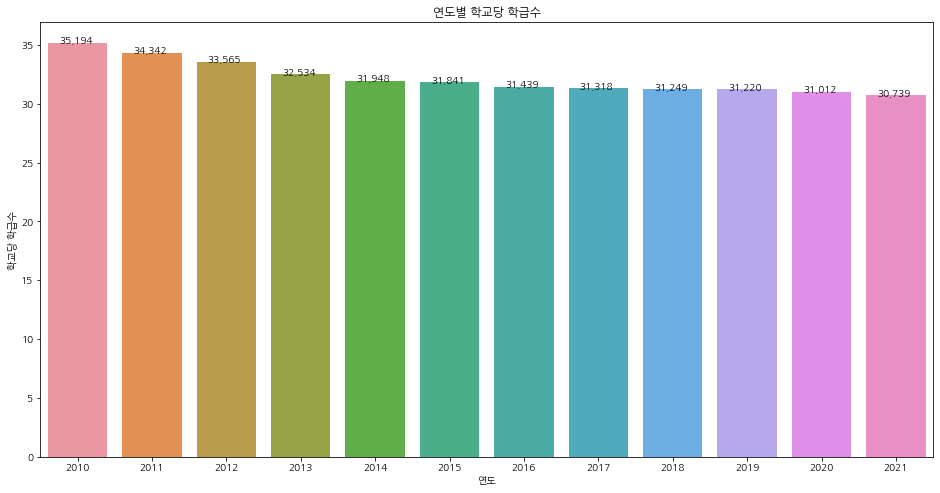

In [328]:
sub_df = new_df.groupby(['연도'],as_index=False)[['학교수 (개)','학급수 (개)']].sum()
sub_df['학교당 학급수'] = sub_df['학급수 (개)'].values/sub_df['학교수 (개)'].values
fig,axes = plt.subplots(1,1,figsize=(16,8))
sns.barplot(data=sub_df,x='연도',y='학교당 학급수',ax=axes).set(title='연도별 학교당 학급수')
for i in range(12):
    h = axes.patches[i].get_height()
    x = axes.patches[i].get_x()
    v = sub_df['학교당 학급수'].values[i]
    axes.annotate(f'{v:.3f}',(x*1+0.15, h))

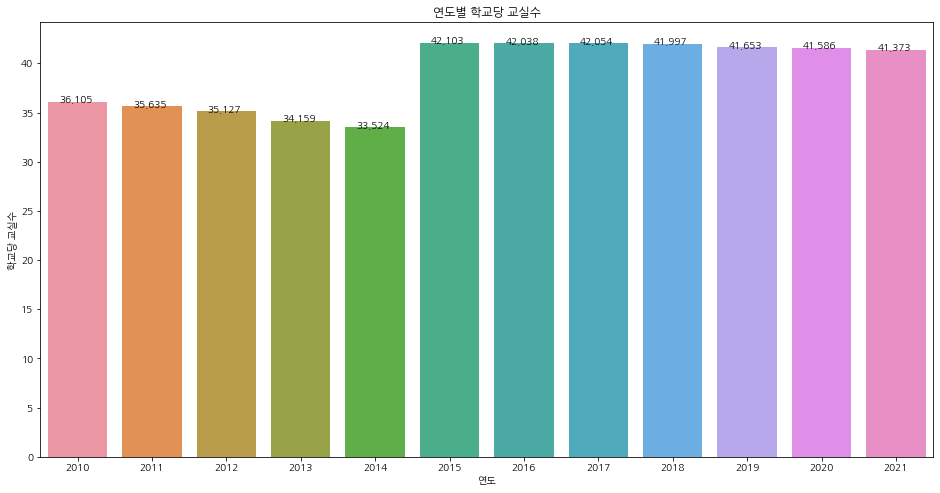

In [330]:
sub_df = new_df[new_df['교실수 (개)']>0].groupby(['연도'],as_index=False)[['학교수 (개)','교실수 (개)']].sum()
sub_df['학교당 교실수'] = sub_df['교실수 (개)'].values/sub_df['학교수 (개)'].values
fig,axes = plt.subplots(1,1,figsize=(16,8))
sns.barplot(data=sub_df,x='연도',y='학교당 교실수',ax=axes).set(title='연도별 학교당 교실수')
for i in range(12):
    h = axes.patches[i].get_height()
    x = axes.patches[i].get_x()
    v = sub_df['학교당 교실수'].values[i]
    axes.annotate(f'{v:.3f}',(x*1+0.15, h))

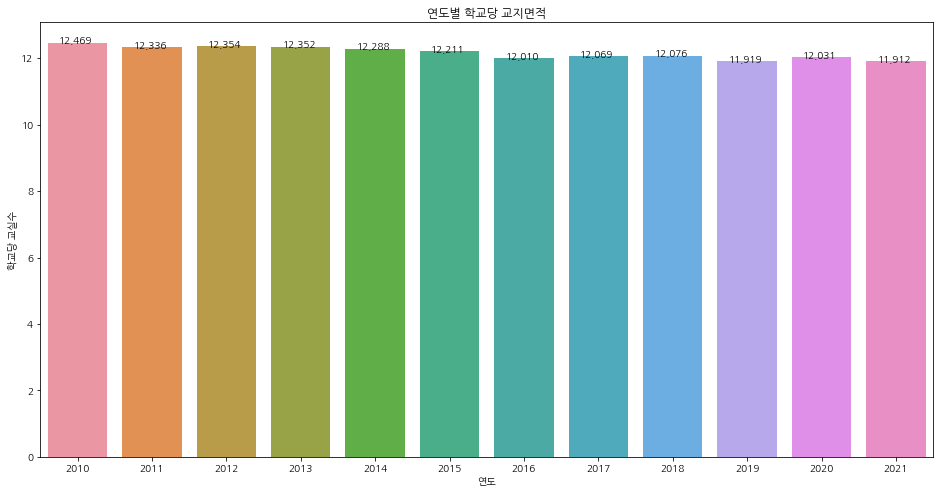

In [333]:
sub_df = new_df[new_df['교지면적 (천㎡)']>0].groupby(['연도'],as_index=False)[['학교수 (개)','교지면적 (천㎡)']].sum()
sub_df['학교당 교실수'] = sub_df['교지면적 (천㎡)'].values/sub_df['학교수 (개)'].values
fig,axes = plt.subplots(1,1,figsize=(16,8))
sns.barplot(data=sub_df,x='연도',y='학교당 교실수',ax=axes).set(title='연도별 학교당 교지면적')
for i in range(12):
    h = axes.patches[i].get_height()
    x = axes.patches[i].get_x()
    v = sub_df['학교당 교실수'].values[i]
    axes.annotate(f'{v:.3f}',(x*1+0.15, h))

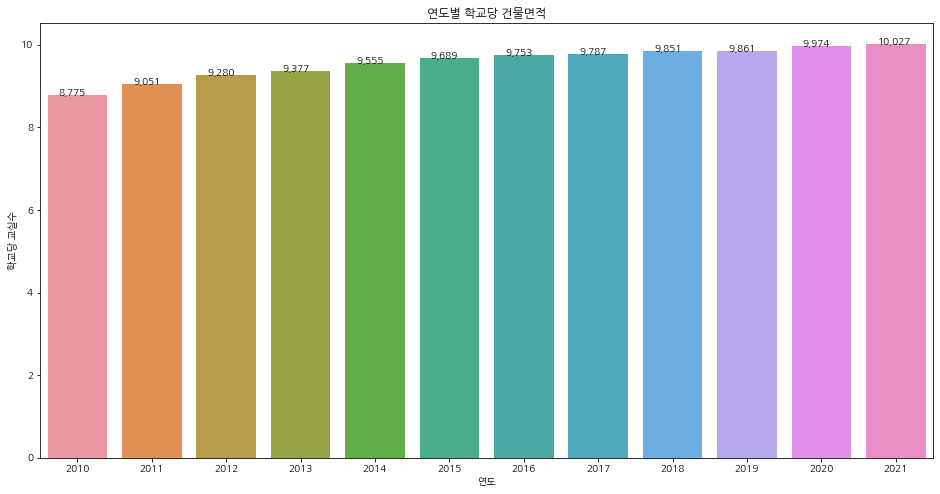

In [335]:
sub_df = new_df[new_df['건물면적 (천㎡)']>0].groupby(['연도'],as_index=False)[['학교수 (개)','건물면적 (천㎡)']].sum()
sub_df['학교당 교실수'] = sub_df['건물면적 (천㎡)'].values/sub_df['학교수 (개)'].values
fig,axes = plt.subplots(1,1,figsize=(16,8))
sns.barplot(data=sub_df,x='연도',y='학교당 교실수',ax=axes).set(title='연도별 학교당 건물면적')
for i in range(12):
    h = axes.patches[i].get_height()
    x = axes.patches[i].get_x()
    v = sub_df['학교당 교실수'].values[i]
    axes.annotate(f'{v:.3f}',(x*1+0.15, h))

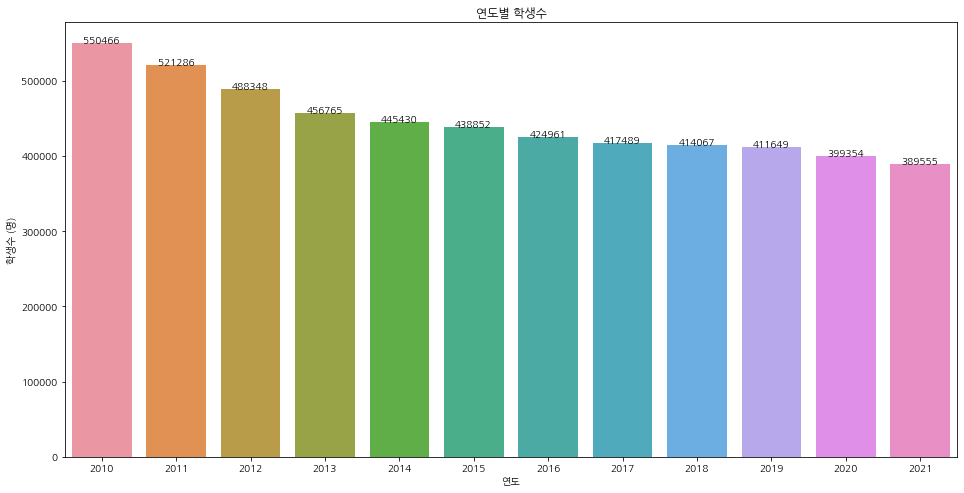

In [341]:
sub_df = new_df.groupby(['연도'],as_index=False)['학생수 (명)'].sum()
fig,axes = plt.subplots(1,1,figsize=(16,8))
sns.barplot(data=sub_df,x='연도',y='학생수 (명)',ax=axes).set(title='연도별 학생수')
for i in range(12):
    h = axes.patches[i].get_height()
    x = axes.patches[i].get_x()
    v = sub_df.values[i][1]
    axes.annotate(str(v),(x*1+0.15, h))

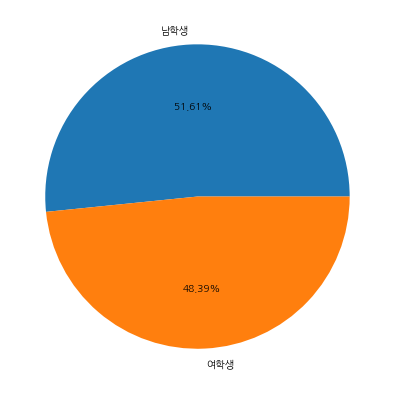

In [344]:
plt.figure(figsize=(7,7))
g=plt.pie(new_df[['학생수 (명)남자', '학생수 (명)여자']].sum(),autopct='%1.2f%%',labels=['남학생', '여학생'])

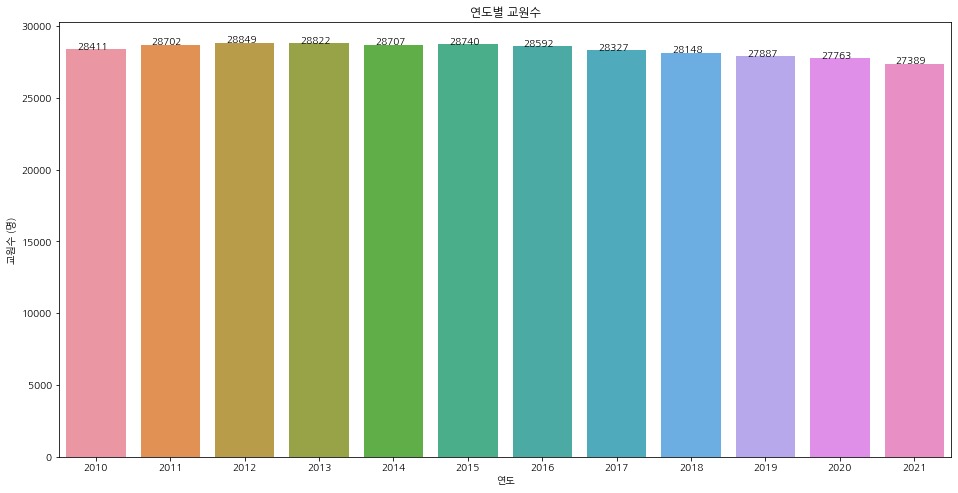

In [345]:
sub_df = new_df.groupby(['연도'],as_index=False)['교원수 (명)'].sum()
fig,axes = plt.subplots(1,1,figsize=(16,8))
sns.barplot(data=sub_df,x='연도',y='교원수 (명)',ax=axes).set(title='연도별 교원수')
for i in range(12):
    h = axes.patches[i].get_height()
    x = axes.patches[i].get_x()
    v = sub_df.values[i][1]
    axes.annotate(str(v),(x*1+0.15, h))

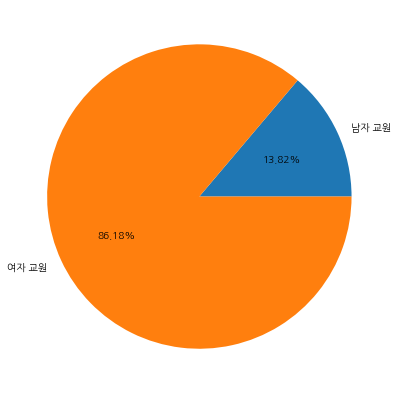

In [347]:
plt.figure(figsize=(7,7))
g=plt.pie(new_df[['교원수 (명)남자', '교원수 (명)여자']].sum(),autopct='%1.2f%%',labels=['남자 교원', '여자 교원'])

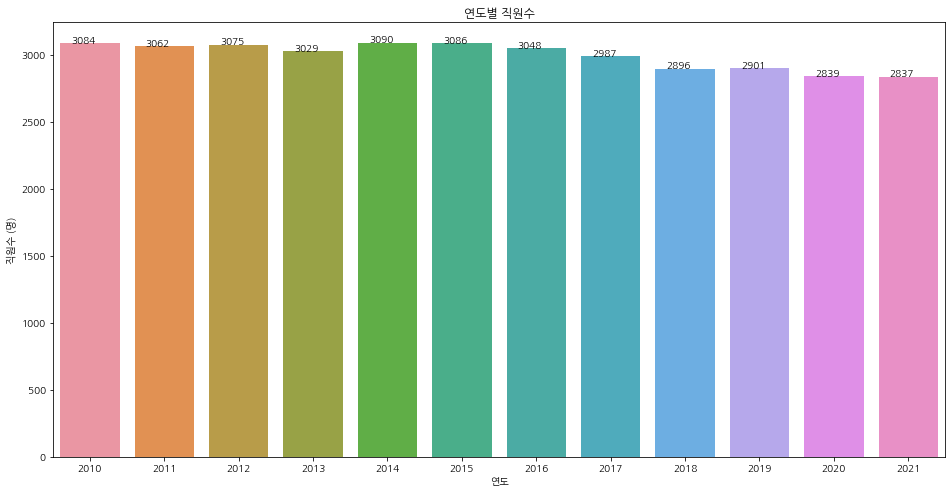

In [348]:
sub_df = new_df.groupby(['연도'],as_index=False)['직원수 (명)'].sum()
fig,axes = plt.subplots(1,1,figsize=(16,8))
sns.barplot(data=sub_df,x='연도',y='직원수 (명)',ax=axes).set(title='연도별 직원수')
for i in range(12):
    h = axes.patches[i].get_height()
    x = axes.patches[i].get_x()
    v = sub_df.values[i][1]
    axes.annotate(str(v),(x*1+0.15, h))

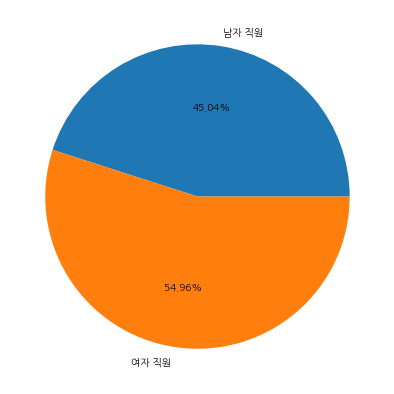

In [349]:
plt.figure(figsize=(7,7))
g=plt.pie(new_df[['직원수 (명)남자', '직원수 (명)여자']].sum(),autopct='%1.2f%%',labels=['남자 직원', '여자 직원'])

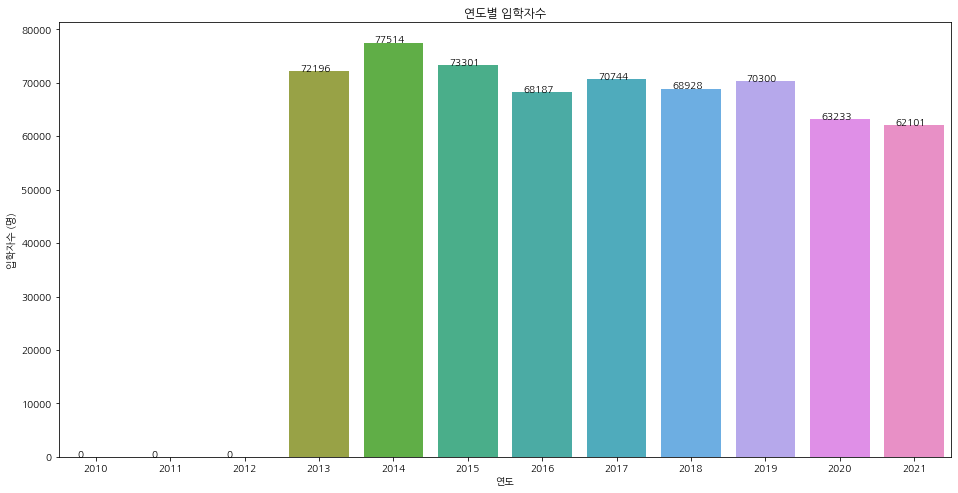

In [361]:
sub_df = new_df.groupby(['연도'],as_index=False)['입학자수 (명)'].sum()
fig,axes = plt.subplots(1,1,figsize=(16,8))
sns.barplot(data=sub_df,x='연도',y='입학자수 (명)',ax=axes).set(title='연도별 입학자수')
for i in range(12):
    h = axes.patches[i].get_height()
    x = axes.patches[i].get_x()
    v = sub_df.values[i][1]
    axes.annotate(str(v),(x*1+0.15, h))

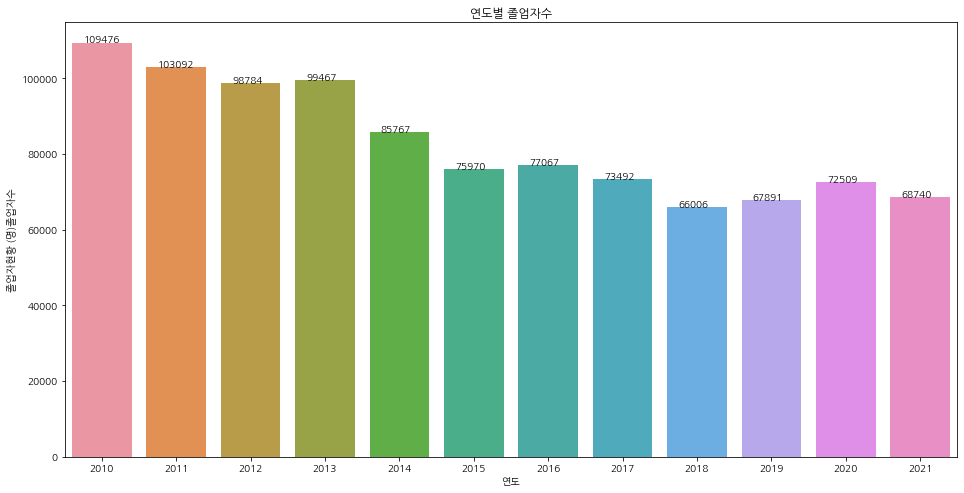

In [358]:
sub_df = new_df.groupby(['연도'],as_index=False)['졸업자현황 (명)졸업자수'].sum()
sub_df = sub_df[sub_df['졸업자현황 (명)졸업자수']>0]
fig,axes = plt.subplots(1,1,figsize=(16,8))
sns.barplot(data=sub_df,x='연도',y='졸업자현황 (명)졸업자수',ax=axes).set(title='연도별 졸업자수')
for i in range(12):
    h = axes.patches[i].get_height()
    x = axes.patches[i].get_x()
    v = sub_df.values[i][1]
    axes.annotate(str(v),(x*1+0.15, h))

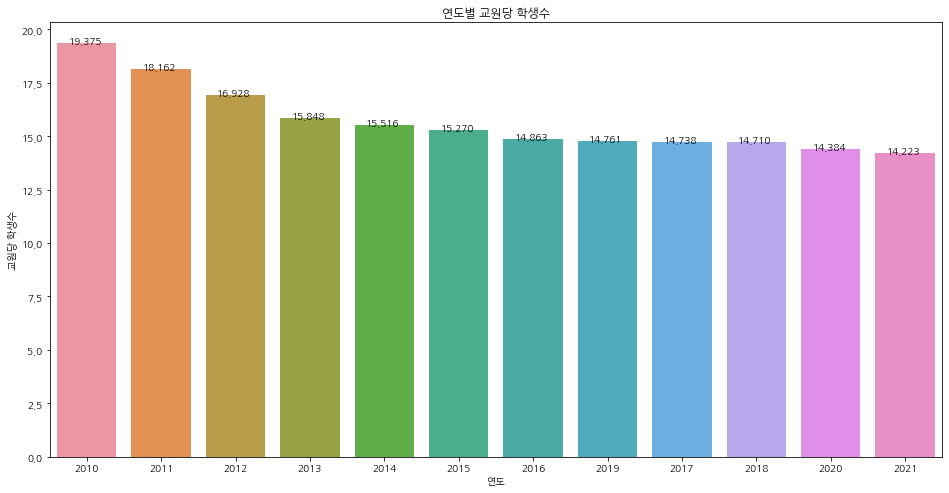

In [382]:
sub_df = new_df.groupby(['연도'],as_index=False)[['교원수 (명)','학생수 (명)']].sum()
sub_df['교원당 학생수'] = sub_df['학생수 (명)'].values/sub_df['교원수 (명)'].values
sub_df = sub_df.sort_values('교원당 학생수',ascending=False)
fig,axes = plt.subplots(1,1,figsize=(16,8))
sns.barplot(data=sub_df,x='연도',y='교원당 학생수',ax=axes).set(title='연도별 교원당 학생수')
for i in range(len(sub_df['연도'].unique())):
    h = axes.patches[i].get_height()
    x = axes.patches[i].get_x()
    v = sub_df['교원당 학생수'].values[i]
    axes.annotate(f'{v:.3f}',(x*1+0.15, h))

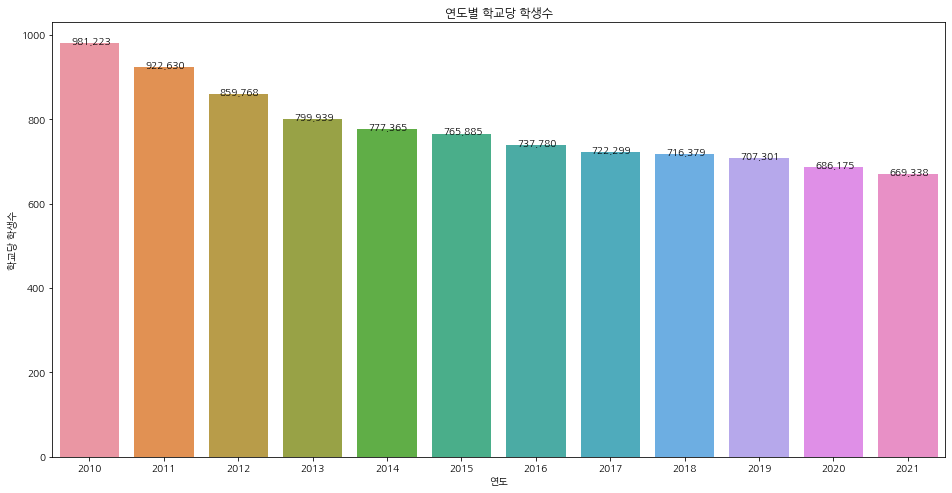

In [386]:
sub_df = new_df.groupby(['연도'],as_index=False)[['학교수 (개)','학생수 (명)']].sum()
sub_df['학교당 학생수'] = sub_df['학생수 (명)'].values/sub_df['학교수 (개)'].values
sub_df = sub_df.sort_values('학교당 학생수',ascending=False)
fig,axes = plt.subplots(1,1,figsize=(16,8))
sns.barplot(data=sub_df,x='연도',y='학교당 학생수',ax=axes).set(title='연도별 학교당 학생수')
for i in range(len(sub_df['연도'].unique())):
    h = axes.patches[i].get_height()
    x = axes.patches[i].get_x()
    v = sub_df['학교당 학생수'].values[i]
    axes.annotate(f'{v:.3f}',(x*1+0.15, h))

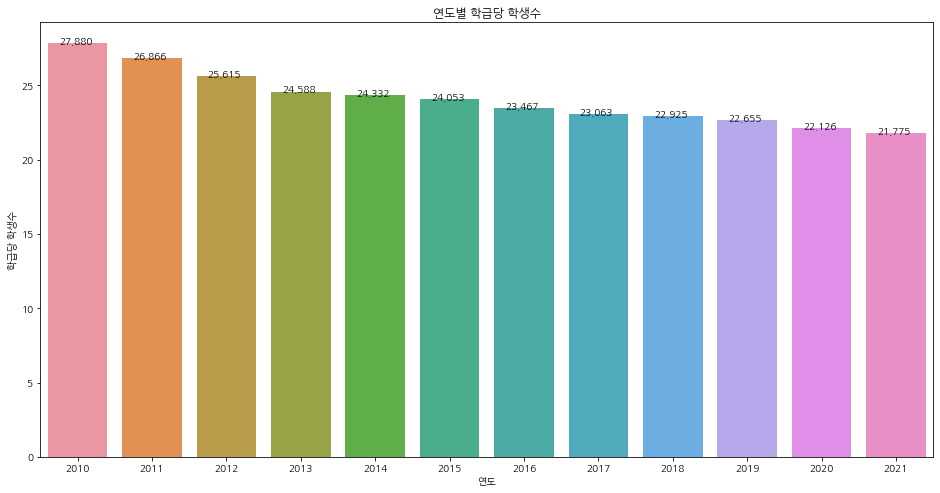

In [387]:
sub_df = new_df.groupby(['연도'],as_index=False)[['학급수 (개)','학생수 (명)']].sum()
sub_df['학급당 학생수'] = sub_df['학생수 (명)'].values/sub_df['학급수 (개)'].values
sub_df = sub_df.sort_values('학급당 학생수',ascending=False)
fig,axes = plt.subplots(1,1,figsize=(16,8))
sns.barplot(data=sub_df,x='연도',y='학급당 학생수',ax=axes).set(title='연도별 학급당 학생수')
for i in range(len(sub_df['연도'].unique())):
    h = axes.patches[i].get_height()
    x = axes.patches[i].get_x()
    v = sub_df['학급당 학생수'].values[i]
    axes.annotate(f'{v:.3f}',(x*1+0.15, h))

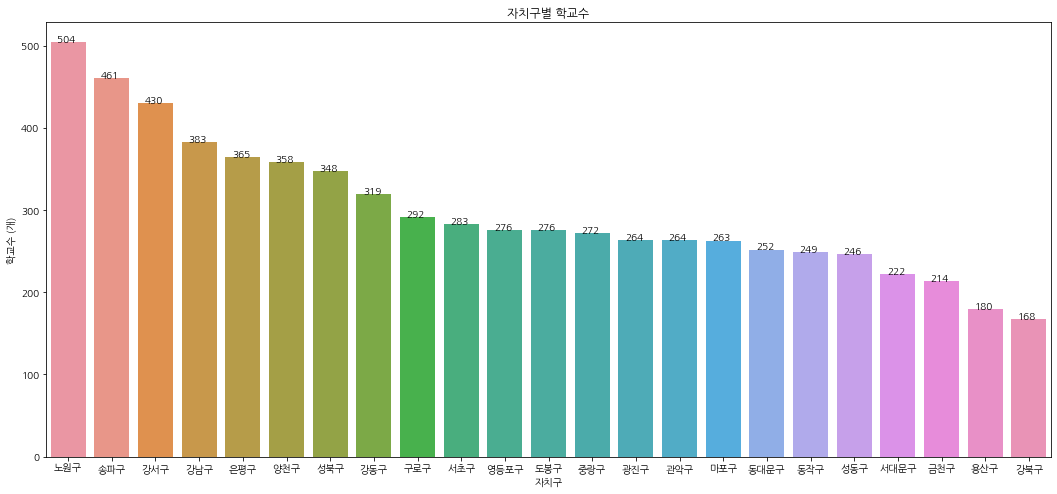

In [371]:
sub_df = new_df.groupby(['자치구'],as_index=False)['학교수 (개)'].sum().sort_values('학교수 (개)',ascending=False)
sub_df = sub_df[sub_df['학교수 (개)']>0]
fig,axes = plt.subplots(1,1,figsize=(18,8))
sns.barplot(data=sub_df,x='자치구',y='학교수 (개)',ax=axes).set(title='자치구별 학교수')
for i in range(len(sub_df['자치구'].unique())):
    h = axes.patches[i].get_height()
    x = axes.patches[i].get_x()
    v = sub_df.values[i][1]
    axes.annotate(str(v),(x*1+0.15, h))

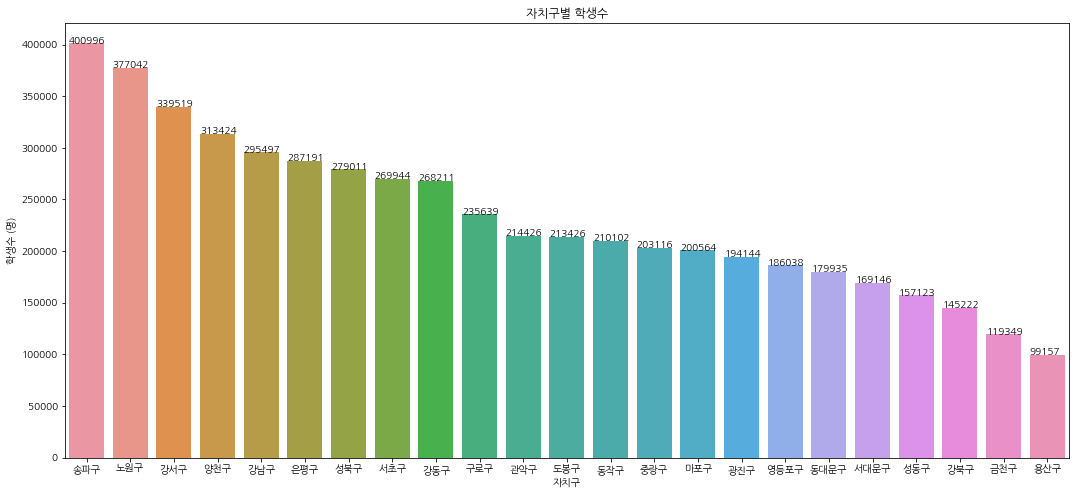

In [367]:
sub_df = new_df.groupby(['자치구'],as_index=False)['학생수 (명)'].sum().sort_values('학생수 (명)',ascending=False)
sub_df = sub_df[sub_df['학생수 (명)']>0]
fig,axes = plt.subplots(1,1,figsize=(18,8))
sns.barplot(data=sub_df,x='자치구',y='학생수 (명)',ax=axes).set(title='자치구별 학생수')
for i in range(len(sub_df['자치구'].unique())):
    h = axes.patches[i].get_height()
    x = axes.patches[i].get_x()
    v = sub_df.values[i][1]
    axes.annotate(str(v),(x*1, h))

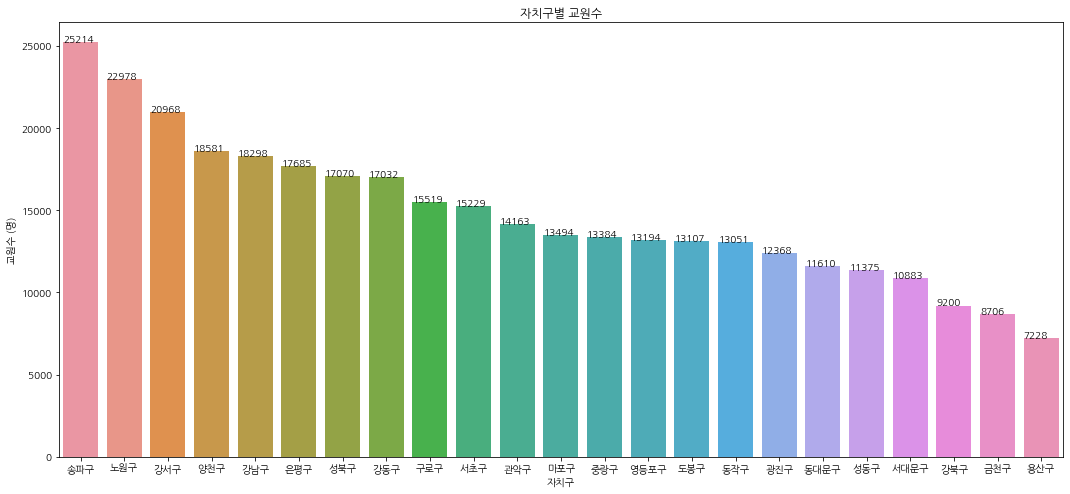

In [372]:
sub_df = new_df.groupby(['자치구'],as_index=False)['교원수 (명)'].sum().sort_values('교원수 (명)',ascending=False)
sub_df = sub_df[sub_df['교원수 (명)']>0]
fig,axes = plt.subplots(1,1,figsize=(18,8))
sns.barplot(data=sub_df,x='자치구',y='교원수 (명)',ax=axes).set(title='자치구별 교원수')
for i in range(len(sub_df['자치구'].unique())):
    h = axes.patches[i].get_height()
    x = axes.patches[i].get_x()
    v = sub_df.values[i][1]
    axes.annotate(str(v),(x*1, h))

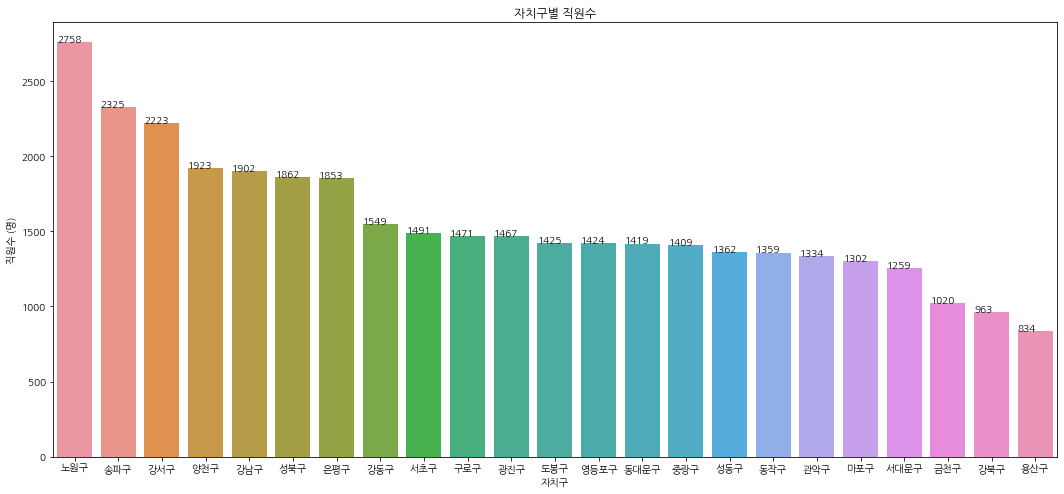

In [374]:
sub_df = new_df.groupby(['자치구'],as_index=False)['직원수 (명)'].sum().sort_values('직원수 (명)',ascending=False)
sub_df = sub_df[sub_df['직원수 (명)']>0]
fig,axes = plt.subplots(1,1,figsize=(18,8))
sns.barplot(data=sub_df,x='자치구',y='직원수 (명)',ax=axes).set(title='자치구별 직원수')
for i in range(len(sub_df['자치구'].unique())):
    h = axes.patches[i].get_height()
    x = axes.patches[i].get_x()
    v = sub_df.values[i][1]
    axes.annotate(str(v),(x*1, h))

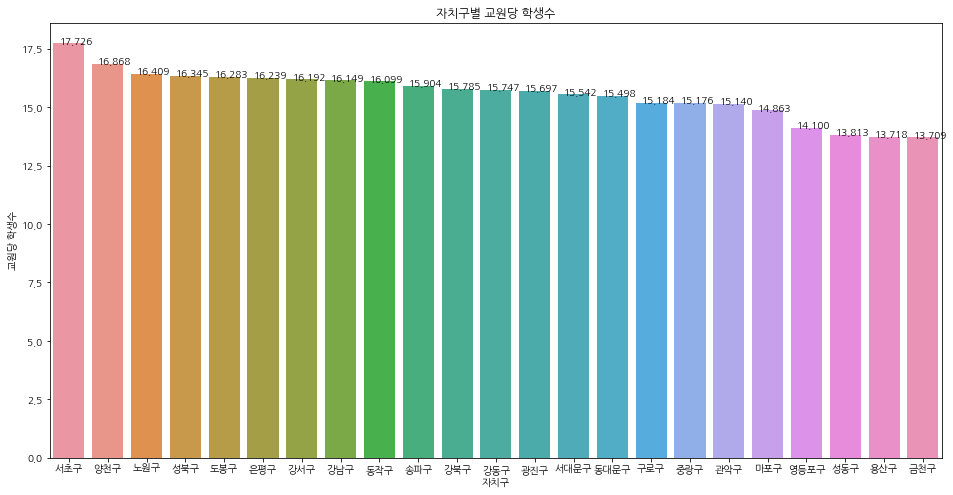

In [381]:
sub_df = new_df.groupby(['자치구'],as_index=False)[['교원수 (명)','학생수 (명)']].sum()
sub_df['교원당 학생수'] = sub_df['학생수 (명)'].values/sub_df['교원수 (명)'].values
sub_df = sub_df.sort_values('교원당 학생수',ascending=False)
fig,axes = plt.subplots(1,1,figsize=(16,8))
sns.barplot(data=sub_df,x='자치구',y='교원당 학생수',ax=axes).set(title='자치구별 교원당 학생수')
for i in range(len(sub_df['자치구'].unique())):
    h = axes.patches[i].get_height()
    x = axes.patches[i].get_x()
    v = sub_df['교원당 학생수'].values[i]
    axes.annotate(f'{v:.3f}',(x*1+0.15, h))

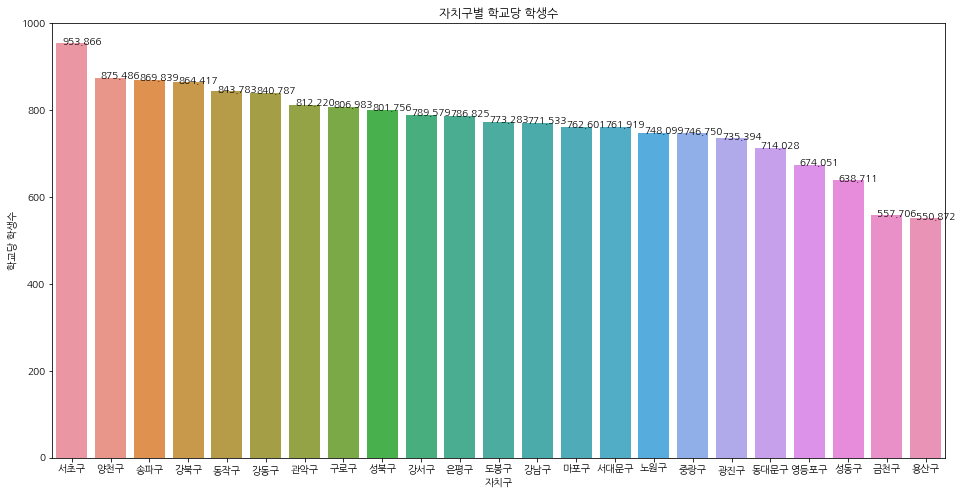

In [385]:
sub_df = new_df.groupby(['자치구'],as_index=False)[['학교수 (개)','학생수 (명)']].sum()
sub_df['학교당 학생수'] = sub_df['학생수 (명)'].values/sub_df['학교수 (개)'].values
sub_df = sub_df.sort_values('학교당 학생수',ascending=False)
fig,axes = plt.subplots(1,1,figsize=(16,8))
sns.barplot(data=sub_df,x='자치구',y='학교당 학생수',ax=axes).set(title='자치구별 학교당 학생수')
for i in range(len(sub_df['자치구'].unique())):
    h = axes.patches[i].get_height()
    x = axes.patches[i].get_x()
    v = sub_df['학교당 학생수'].values[i]
    axes.annotate(f'{v:.3f}',(x*1+0.15, h))

**연도별 학교수, 학급수, 교실수, 교지면적은?**

- 연도별 학교수는 매년 증가하고, 학급수는 매년 감소한다.

- 교실수는 꾸준히 감소하다가 2015년에 급증한다.

- 교지면적은 큰 차이가 없다.

**연도별 학교당 학급수, 교실수, 교지면적, 건물면적은?**

- 학교당 학급수는 매년 감소한다.

- 학교당 교실수는 꾸준히 감소하다 2015년에 급증하고, 다시 감소하는 추세다.

- 학교당 교지면적은 꾸준히 감소하고, 건물면적은 꾸준히 증가한다.

**연도별 학생수, 교원수, 직원수는?**

- 학생수는 꾸준히 감소하고, 남학생이 51.61%로 조금 더 많다.

- 교원수는 큰 차이는 없으나 꾸준히 감소하는 추세며, 86.18%로 대부분 여성이다.

- 직원수는 조금씩 감소하는 추세고, 54.96%가 여성이다.

**연도별 입학자수, 졸업자수는?**

- 연도별 입학자수와 졸업자수는 감소하는 추세다.

**연도별 교원당,학교당,학급당 학생수는?**

- 교원당,학교당 학급당 학생수는 꾸준히 감소하고 있다.

**지역별 학교수, 학생수, 교원수, 직원수는?**

- 노원구,송파구,강서구,강남구,은평구,양천구,성북구 등이 학교수,학생수,교원수,직원수가 많다.

**지역별 교원당,학교당 학생수는?**

- 교원당,학교당 학생수는 서처구가 가장 많다.